# Import modules

In [72]:
from lacbox.io import load_pwr, load_ind, load_inds
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from pathlib import Path
from lacbox.io import load_ae
import numpy as np
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions





In [73]:
# Plotting power for multiple tsr

# Path for the file
pwr_path = Path.cwd().parent / 'res_hawc2s' / 'Jim_Design_hawc2s_multitsr.pwr' 
# Load the data
pwr_data = load_pwr(pwr_path)
# Print the names in the dict
pwr_data.keys()


dict_keys(['V_ms', 'P_kW', 'T_kN', 'Cp', 'Ct', 'Pitch_Q_Nm', 'Flap_M_kNm', 'Edge_M_kNm', 'Pitch_deg', 'Speed_rpm', 'Tip_x_m', 'Tip_y_m', 'Tip_z_m', 'J_rot_kgm2', 'J_DT_kgm2', 'Torsion_rad', 'Torque_kNm'])

7.521770691092424


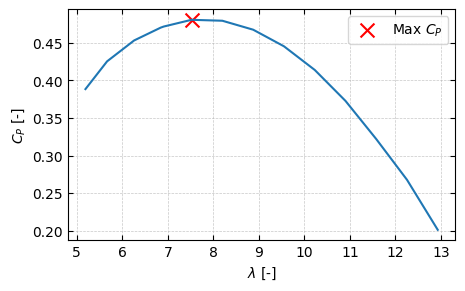

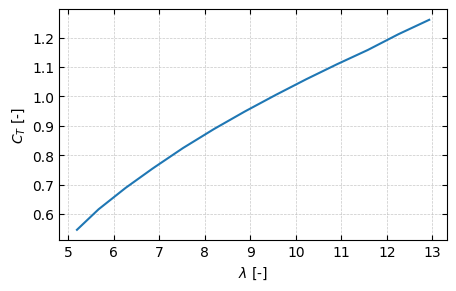

In [74]:
 #        V [m/s]  1           P [kW]  2           T [kN]  3           Cp [-]  4           Ct [-]  5     Pitch Q [Nm]  6     Flap M [kNm]  7     Edge M [kNm]  8      Pitch [deg]  9      Speed [rpm] 10        Tip x [m] 11        Tip y [m] 12        Tip z [m] 13   J_rot [kg*m^2] 14    J_DT [kg*m^2] 15      Tors. [rad] 28    Torque [kNm]  29
# Given rotor radius R (provide the value in meters)
R = 88.042 + 2.8  # [m]

# Load the data using np.loadtxt
# Adjust the delimiter and number of columns if needed

data = np.loadtxt(pwr_path, skiprows=1)

# Extract relevant columns
wind_speed = data[:, 0]  # V [m/s]
rpm = data[:, 9]         # Speed [rpm]
Cp = data[:, 3]          # Cp [-]
Ct = data[:, 4]          # Ct [-]
pitch = data[:,8]        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega = np.pi * rpm / 30
TSR = (omega * R) / wind_speed

# Find the max Cp and its corresponding TSR
max_cp_index = np.argmax(Cp)
max_cp = Cp[max_cp_index]
max_tsr = TSR[max_cp_index]

print(max_tsr)


# Plot Cp vs TSR
plt.figure(figsize=(5, 3))
plt.plot(TSR, Cp)
# Plot the max point with an 'x'
plt.scatter(max_tsr, max_cp, color='red', marker='x', s=100, label=r'Max $C_P$')
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_P$ [-]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('../Plots/Ct_TSR_JIM' + '.pdf', dpi=300, bbox_inches='tight')



# Plot Ct vs TSR
plt.figure(figsize=(5,3))
plt.plot(TSR, Ct)
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('../Plots/Ct_TSR_JIM' + '.pdf', dpi=300, bbox_inches='tight')

In [75]:
print(max_cp)

0.4804616737


# Rotor speed and pitch angle vs wind speed

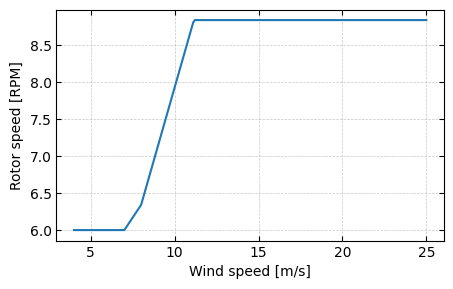

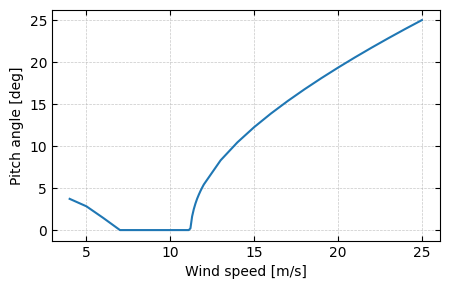

In [76]:
# Import the data from the appropriate file
data_2 = np.loadtxt('../res_hawc2s/Jim_Design_hawc2s_multitsr_compute_rigid_opt.opt', skiprows=1)

# Extract relevant columns
wind_speed_2 = data_2[:, 0]     # V [m/s]
pitch = data_2[:, 1]          # pitch [deg]
rot_speed = data_2[:, 2]      # rotor speed [rpm]
power = data_2[:, 3]          # aero power [kW]
thrust = data_2[:,4]          # thrust [kN]

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]
A = np.pi*R**2                              # rotor surface are
Cp_2 = power*1000/(0.5*rho*wind_speed_2**3*A)    # Power coefficient [-]  
Ct_2 = thrust*1000/(0.5*rho*wind_speed_2**2*A)   # Thrust coefficient [-]

# Plot RPM vs wind speed
plt.figure(figsize=(5, 3))

plt.plot(wind_speed_2, rot_speed)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Rotor speed [RPM]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/RPM_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

# Plot pitch vs wind speed
plt.figure(figsize=(5,3))
plt.plot(wind_speed_2, pitch)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Pitch angle [deg]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/pitch_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

# Aero power and Cp

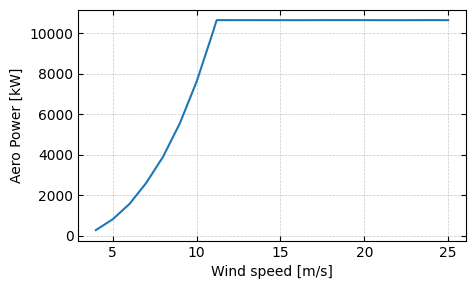

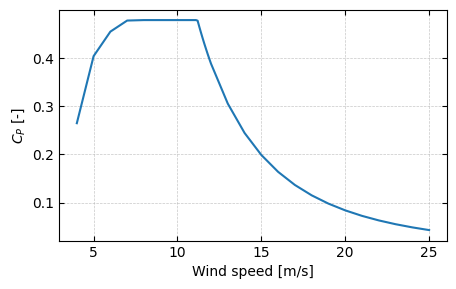

In [77]:
# Plot Aero power vs wind speed
plt.figure(figsize=(5, 3))

plt.plot(wind_speed_2, power)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Aero Power [kW]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/Power_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

# Plot CP vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_2, Cp_2)
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_P$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/CP_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

# Aero thrust and Ct

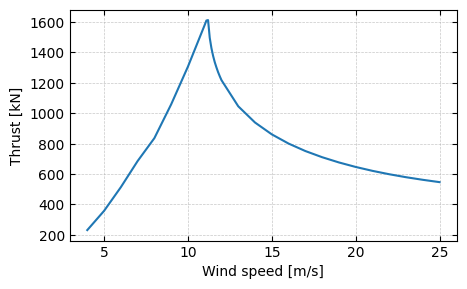

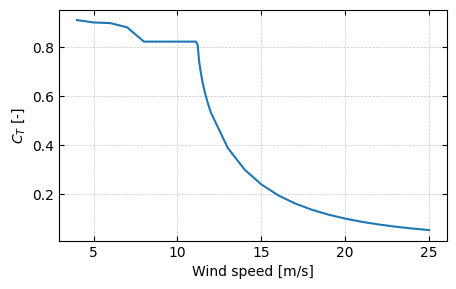

In [78]:
# Plot thrust vs wind speed
plt.figure(figsize=(5, 3))

plt.plot(wind_speed_2, thrust)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Thrust [kN]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/Thrust_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Ct vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_2, Ct_2)
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/CT_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')

#Old and new design thrust comparison

In [79]:
"""Data new flexible Design"""

pwr_path_new_design = Path.cwd().parent / 'res_hawc2s' / 'Jim_Design_get_pwr_flex_with_shaving.pwr'

pwr_data_new = load_pwr(pwr_path_new_design)
# Print the names in the dict
pwr_data.keys()

# Extract relevant columns
wind_speed_new = pwr_data_new['V_ms']  # V [m/s]
rpm_new = pwr_data_new['Speed_rpm']         # Speed [rpm]
thrust_new = pwr_data_new['T_kN']          # thrust [kN]
power_new = pwr_data_new['P_kW']            # Power [kW]
pitch_new = pwr_data_new['Pitch_deg']        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega_new = np.pi * rpm_new / 30
TSR_new = (omega_new * R) / wind_speed_new

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]
A = np.pi*R**2                              # rotor surface are
CT_new = thrust_new*1000/(0.5*rho*wind_speed_new**2*A)   # Thrust coefficient [-]
CP_new = power_new*1000/(0.5*rho*wind_speed_new**3*A)     # Power coefficient [-]

In [80]:
# Find the max Thrust and its corresponding wind speed
max_thrust_index = np.argmax(thrust_new)
max_thrust = thrust_new[max_thrust_index]
max_wind_speed_new = wind_speed_new[max_thrust_index]
print(max_wind_speed_new)

11.0


In [81]:
"""Data old design"""
pwr_path_old_design = Path.cwd().parent / 'res_hawc2s' / 'Jim_Design_get_pwr_no_shaving.pwr'

pwr_data_old = load_pwr(pwr_path_old_design)
# Print the names in the dict
pwr_data.keys()

# Extract relevant columns
wind_speed_old = pwr_data_old['V_ms']  # V [m/s]
rpm_old = pwr_data_old['Speed_rpm']         # Speed [rpm]
thrust_old = pwr_data_old['T_kN']          # Cp [-]
power_old = pwr_data_old['P_kW']            # Power [kW]
pitch_old = pwr_data_old['Pitch_deg']        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega_old = np.pi * rpm_old / 30
TSR_old = (omega_old * R) / wind_speed_old

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]
A = np.pi*R**2                              # rotor surface are
CT_old = thrust_old*1000/(0.5*rho*wind_speed_old**2*A)   # Thrust coefficient [-]
CP_old = power_old*1000/(0.5*rho*wind_speed_old**3*A)     # Power coefficient [-]

In [82]:
"""DTU 10 MW Data"""
# Path for the file
pwr_path = Path.cwd().parent.parent / 'dtu_10mw' / 'res_hawc2s' / 'dtu_10mw_compute_rigid_opt.pwr' 

# test_data_path+"/DTU_10MW_RWT.pwr"

pwr_data_DTU = load_pwr(pwr_path)
# Print the names in the dict
pwr_data.keys()

# Extract relevant columns
wind_speed_DTU = pwr_data_DTU['V_ms']  # V [m/s]
rpm_DTU = pwr_data_DTU['Speed_rpm']         # Speed [rpm]
thrust_DTU = pwr_data_DTU['T_kN']          # Cp [-]
power_DTU = pwr_data_DTU['P_kW']            # Power [kW]
pitch_DTU = pwr_data_DTU['Pitch_deg']        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega_DTU = np.pi * rpm_DTU / 30
TSR_DTU = (omega_DTU * R) / wind_speed_DTU

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]
R_DTU = 89.166                  # radius from DTU 10 MW report
A = np.pi*R_DTU**2                              # rotor surface are
CT_DTU = thrust_DTU*1000/(0.5*rho*wind_speed_DTU**2*A)   # Thrust coefficient [-]
CP_DTU = power_DTU*1000/(0.5*rho*wind_speed_DTU**3*A)     # Power coefficient [-]



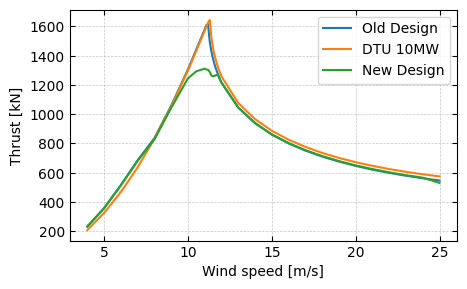

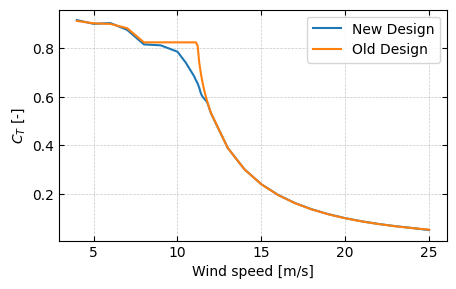

In [83]:
# Plot thrust vs wind speed
plt.figure(figsize=(5, 3))

plt.plot(wind_speed_old, thrust_old,label='Old Design')
plt.plot(wind_speed_DTU, thrust_DTU,label='DTU 10MW')
plt.plot(wind_speed_new, thrust_new,label='New Design')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Thrust [kN]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
# plt.savefig('../Plots/Thrust_V_Comparison' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Ct vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_new, CT_new, label='New Design')
plt.plot(wind_speed_old, CT_old, label= 'Old Design')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
# plt.savefig('../Plots/CT_V_Comparison' + '.pdf', dpi=300, bbox_inches='tight')

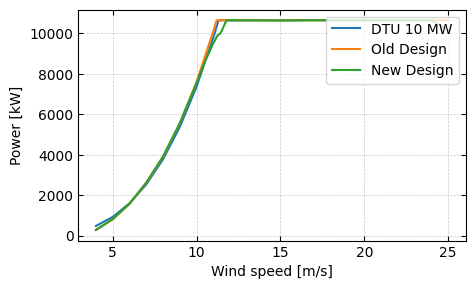

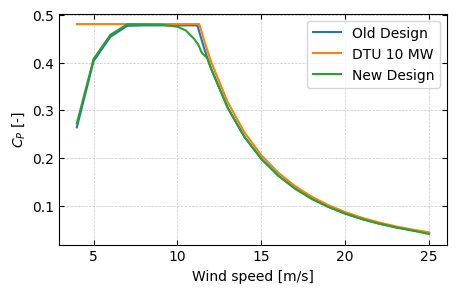

In [84]:
# Plot power vs wind speed
plt.figure(figsize=(5, 3))

plt.plot(wind_speed_DTU, power_DTU,label='DTU 10 MW')
plt.plot(wind_speed_old, power_old,label='Old Design')
plt.plot(wind_speed_new, power_new,label='New Design')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
# plt.savefig('../Plots/Power_V_Comparison' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Ct vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_old, CP_old, label= 'Old Design')
plt.plot(wind_speed_DTU, CP_DTU, label= 'DTU 10 MW')
plt.plot(wind_speed_new, CP_new, label='New Design')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_P$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')
# plt.savefig('../Plots/CP_V_Comparison' + '.pdf', dpi=300, bbox_inches='tight')